MOEIR GLOBAL RECALL

el GR se toma del directorio "globalPRF1"

Hay un archivo por tópico.
Cada archivo tiene:

Estadísticas globales en filas:

Precisión (esta es GLOBAL - en MOGP no la calculamos)
Recall GLOBAL (como el que uso yo)
F1

Las corridas están en columnas. La 0 es sobre la población inicial y los resultados de las 5 corridas.

P_0      P_1     P_2      P_3      P_4      P_5

GR_0     GR_1    GR_2     GR_3     GR_4     GR_5

F1_0     F1_1    F1_2     F1_3     F1_4     F1_5



In [44]:
import os
import pandas as pd
import math


# folder path
dir_path  = '/home/cecilia/repos/mogp_with_terms/moeir_comparison/to_ceci/globalPRF1/'
save_path = '/home/cecilia/repos/mogp_with_terms/moeir_comparison/'

files = os.listdir(dir_path)

#test
#topicos = [topicos[0], topicos[1]]
print(files)

['transposeRep_global_metrics221.csv', 'transposeRep_global_metrics215.csv', 'transposeRep_global_metrics58.csv', 'readme.txt', 'transposeRep_global_metrics561.csv', 'transposeRep_global_metrics465.csv', 'transposeRep_global_metrics537.csv', 'transposeRep_global_metrics538.csv', 'transposeRep_global_metrics428.csv', 'transposeRep_global_metrics289.csv', 'transposeRep_global_metrics363.csv', 'transposeRep_global_metrics418.csv', 'transposeRep_global_metrics528.csv', 'transposeRep_global_metrics259.csv', 'transposeRep_global_metrics37.csv', 'transposeRep_global_metrics187.csv', 'transposeRep_global_metrics99.csv', 'transposeRep_global_metrics350.csv', 'transposeRep_global_metrics25.csv', 'transposeRep_global_metrics586.csv', 'transposeRep_global_metrics403.csv', 'transposeRep_global_metrics556.csv', 'transposeRep_global_metrics134.csv', 'transposeRep_global_metrics529.csv', 'transposeRep_global_metrics1.csv', 'transposeRep_global_metrics476.csv']


In [45]:
#df_ave_data = pd.DataFrame(columns=['topic', '0', '1','2','3', '4', '5'])
df_ave_data = pd.DataFrame()
   
# inserto nro de topico


for f in sorted(files):
    row = []
    if "transposeRep_global_" in f:
                    
        t = f.split('.')[0] # quito el .csv
        t = t.split('_')[2] # me quedo con "metric#topico"
        t = t[7:] # solo nro de topico
        print(t)
        path_pr = "".join([dir_path, f])
        print(path_pr)
        
        # read text file into pandas DataFrame
        df_metric = pd.read_csv(path_pr, header=None, sep=',')
        print(df_metric)
        # drop column 1-5 from DF that correspods to evolved pop
        #  Initial random pop from moeir is index 0
        df_metric = df_metric.drop([1,2,3,4,5],axis=1)
        print(df_metric)
        # tomar fila 1 de cada DF que es el RECALL GLOBAL
        entry = df_metric.iloc[1] 
        print(entry)
        entry['topic'] = t
        
        df_ave_data = df_ave_data.append(entry)
                  

df_ave_data.reset_index(drop=True)
## df con promedio de la ultima poblacion de p@10 de cada corrida para cada topico
##    topic     1      2       3           4      5        
##    134	0.7050	0.719	0.760000	0.816	0.808
##     1	    0.8055	0.817	0.799333	0.690	0.830
#df_ave_data = pd.concat([pd.DataFrame([row], columns=df_ave_data.columns), df_ave_data], ignore_index=True)
#
#
## set the 'topic' column as index
df_ave_data.set_index('topic', inplace=True)
#df_ave_data = df_ave_data.sort_values(by='topic', ascending=True)
#
#df_ave_data = df_ave_data.transpose()
##df_ave_data.to_csv(save_path + 'moeir_globalRecall_evaluation_by_run_last_gen.csv')
#
df_ave_data

1
/home/cecilia/repos/mogp_with_terms/moeir_comparison/to_ceci/globalPRF1/transposeRep_global_metrics1.csv
          0         1         2         3         4         5
0  0.020556  0.335714  0.136531  0.375527  0.221875  0.369159
1  0.585859  0.474747  0.373737  0.449495  0.358586  0.398990
2  0.039719  0.393305  0.200000  0.409195  0.274131  0.383495
          0
0  0.020556
1  0.585859
2  0.039719
0    0.585859
Name: 1, dtype: float64
134
/home/cecilia/repos/mogp_with_terms/moeir_comparison/to_ceci/globalPRF1/transposeRep_global_metrics134.csv
          0         1         2         3         4         5
0  0.057452  0.193154  0.149803  0.210980  0.094818  0.183079
1  0.661017  0.669492  0.644068  0.759887  0.759887  0.745763
2  0.105715  0.299810  0.243070  0.330264  0.168599  0.293987
          0
0  0.057452
1  0.661017
2  0.105715
0    0.661017
Name: 1, dtype: float64
187
/home/cecilia/repos/mogp_with_terms/moeir_comparison/to_ceci/globalPRF1/transposeRep_global_metrics187.csv
   

,0
topic,
1,0.585859
134,0.661017
187,0.662651
215,0.571429
221,0.600698
25,0.792683
259,0.166667
289,0.330645
350,0.672414


In [46]:
df_ave_data = df_ave_data.transpose()

#df_ave_data.columns = df_ave_data.iloc[1] # pongo el topico como header
#df_ave_data= df_ave_data.drop([1], axis=1) #borra la fila que tiene a los topic ids ya que son ahora header
df_ave_data

topic,1,134,187,215,221,25,259,289,350,363,...,476,528,529,537,538,556,561,58,586,99
0,0.585859,0.661017,0.662651,0.571429,0.600698,0.792683,0.166667,0.330645,0.672414,0.447761,...,0.42,0.583333,0.591954,0.451613,0.492035,0.236686,0.495327,0.203081,0.181319,0.434211


In [47]:

stats_by_topic = df_ave_data.agg(['mean', 'count', 'std'])
stats_by_topic

,1,134,187,215,221,25,259,289,350,363,...,476,528,529,537,538,556,561,58,586,99
mean,0.585859,0.661017,0.662651,0.571429,0.600698,0.792683,0.166667,0.330645,0.672414,0.447761,...,0.42,0.583333,0.591954,0.451613,0.492035,0.236686,0.495327,0.203081,0.181319,0.434211
count,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
stats_all_topics = stats_by_topic.transpose()
stats_all_topics

,mean,count,std
1,0.585859,1.0,NaN
134,0.661017,1.0,NaN
187,0.662651,1.0,NaN
215,0.571429,1.0,NaN
221,0.600698,1.0,NaN
25,0.792683,1.0,NaN
259,0.166667,1.0,NaN
289,0.330645,1.0,NaN
350,0.672414,1.0,NaN
363,0.447761,1.0,NaN


se promedian solo los promedios de los tópicos y se calcula el STD sobre esos promedios

In [49]:
print(stats_all_topics['mean'].describe()) # me quedo con los promedios de los 'mean'
stats_all_topics=stats_all_topics['mean'].describe()


t = pd.DataFrame({  'mean_gr': [stats_all_topics['mean']],                    
                    'count_gr': [stats_all_topics['count']],
                    'std_gr': [stats_all_topics['std']]})
ci95_hi = []
ci95_lo = []

m, c, s = t.loc[0]

ci95_hi.append(m + 1.96*s/math.sqrt(c))
ci95_lo.append(m - 1.96*s/math.sqrt(c))

t['ci95_lo_prec'] = ci95_lo
t['ci95_hi_prec'] = ci95_hi


t.to_csv(save_path + 'moeir_globalRecall_evaluation_stats_gen_1.csv')
t

count    25.000000
mean      0.501027
std       0.172936
min       0.166667
25%       0.426667
50%       0.559055
75%       0.600698
max       0.792683
Name: mean, dtype: float64


,mean_gr,count_gr,std_gr,ci95_lo_prec,ci95_hi_prec
0,0.501027,25.0,0.172936,0.433237,0.568818


Text(0.5, 0.98, 'MOEIR Global Recall  ')

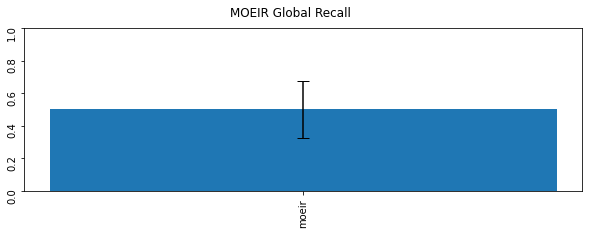

In [50]:
######### GLOBAL RECALL
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1,1, figsize=(10, 3), sharey=False)
axs.tick_params(labelrotation=90)
axs.bar('moeir', t['mean_gr'], yerr=t['std_gr'], capsize=6)
axs.set_ylim(0,1)
fig.suptitle('MOEIR Global Recall  ')

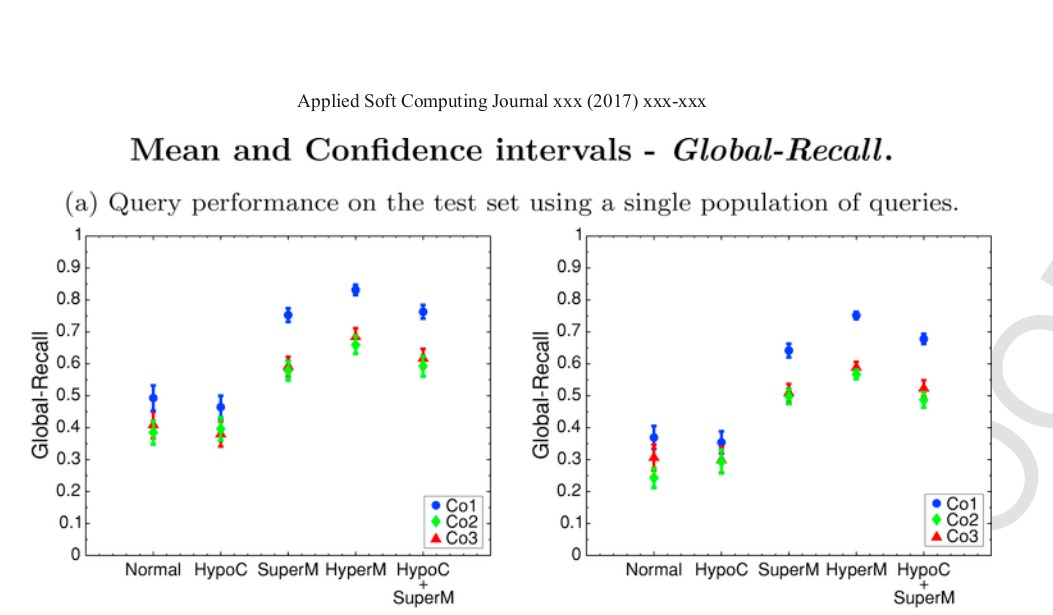

In [51]:
from IPython.display import Image

Image(filename='/home/cecilia/repos/mogp_with_terms/moeir_comparison/to_ceci/ASOC_GR.jpeg')